In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Max_top1 =  89.16, epoch=117


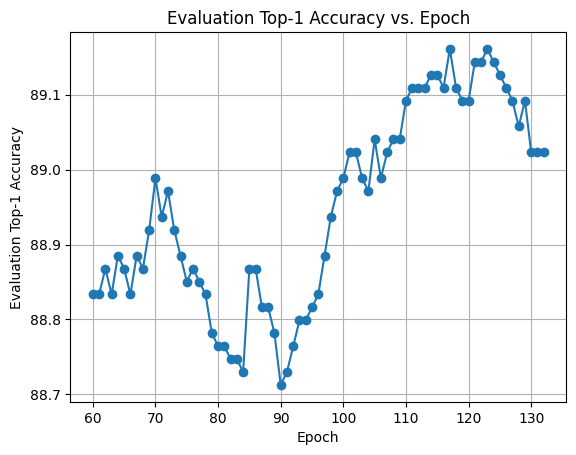

In [22]:
# 读取CSV文件，跳过开头的行数
data='/data/hjy/SSF/vit_base_patch16_224_in21k/fgvc/cub2011/ssf/20230820-022856-vit_base_patch16_224_in21k-224/summary.csv'
skip_rows = 0
S=60#None
E=None
data = pd.read_csv(data, skiprows=skip_rows)
# 选择epoch和eval_top1列
epochs = data['epoch']
eval_top1 = data['eval_top1']
# 选择最大值
print(f'Max_top1 = {max(eval_top1.tolist()):6.2f}, epoch={epochs[eval_top1.idxmax()]:3}')
epochs=epochs[S:E]
eval_top1 = eval_top1[S:E]
# 绘制图形
plt.plot(epochs, eval_top1, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Evaluation Top-1 Accuracy')
plt.title('Evaluation Top-1 Accuracy vs. Epoch')
plt.grid(True)
plt.show()
